#### To ignore warnings, importing warnings

In [37]:
import warnings
warnings.filterwarnings("ignore")

#### Importing required libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics

# To get the version of the libraries used

print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.21.5
1.4.2
0.11.2


In [39]:
# Loading train.csv file
house_data = pd.read_csv("train.csv")

# check the total count of rows and columns
print(house_data.shape)

(1460, 81)


In [40]:
# to access the first n rows of the file
print(house_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [41]:
print(house_data.describe(include ='all'))

                 Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utili

In [42]:
# To get the information

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Checking for null values

In [43]:
house_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [44]:
# Checking the column with unique value

house_data.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

#### Checking the value count

In [45]:
house_data.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [46]:
house_data.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [47]:
house_data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [48]:
house_data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

#### Preparing data

In [49]:
# Checking for the percentage of Null values

df_missing=pd.DataFrame((round(100*(house_data.isnull().sum()/len(house_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [50]:
## Treating the NaN Values


house_data['GarageYrBlt'] = house_data['GarageYrBlt'].fillna(0)
house_data['MasVnrType'] = house_data['MasVnrType'].fillna('None')
house_data['MasVnrArea'] = house_data['MasVnrArea'].fillna(0)
house_data['MasVnrArea'] = house_data['MasVnrArea'].fillna(0)
house_data['Electrical'] = house_data['Electrical'].fillna("Other")

In [51]:
# As (LotFontgage, Alley, FireplaceQu, PoolQC, Fence, MiscFeature, MoSold) has large Null value. So, dropping it 

house_data = house_data.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MoSold'],axis='columns')

In [52]:
# Changing the Nan Values with 'No_Basement_data' for columns based on Basement

for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    house_data[col] = house_data[col].fillna('No_Basement_data')

In [53]:
# Changing the Nan Values with 'No_Garage_data' for columns based on Garage

for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    house_data[col] = house_data[col].fillna('No_Garage_data')

In [54]:
# Checking the information after analysis

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [55]:
# Changing GarageYrBlt from Float to int

house_data['GarageYrBlt'] = house_data['GarageYrBlt'].astype(int)

## Performing EDA

### Univariate and Bivariate Analysis

In [114]:
house_data_numeric = house_data.select_dtypes(include=['float64', 'int64'])
house_data_numeric.head()

,Id,MSSubClass,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SalePrice
0,1,60,8450,1,7,5,2003,2003,196.0,706,...,1,0,61,0,0,0,0,0,2008,208500
1,2,20,9600,1,6,8,1976,1976,0.0,978,...,1,298,0,0,0,0,0,0,2007,181500
2,3,60,11250,1,7,5,2001,2002,162.0,486,...,1,0,42,0,0,0,0,0,2008,223500
3,4,70,9550,1,7,5,1915,1970,0.0,216,...,1,0,35,272,0,0,0,0,2006,140000
4,5,60,14260,1,8,5,2000,2000,350.0,655,...,1,192,84,0,0,0,0,0,2008,250000


Text(0.5, 1.0, 'Sale Price Outliers check')

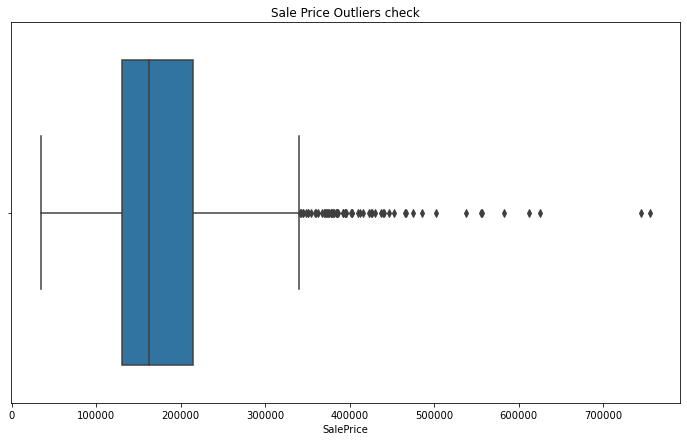

In [56]:
# Checking for outliers in saleprice

plt.figure(figsize = (12,7))
sns.boxplot(x='SalePrice', data=house_data)
plt.title('Sale Price Outliers check')

Text(0, 0.5, 'Sale Price')

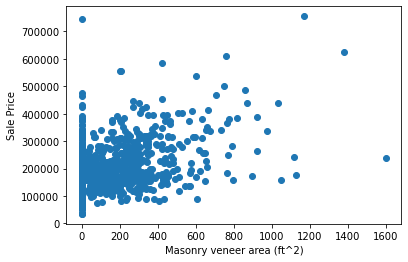

In [57]:
# Scatter plotting Veneer are vs Sale price

plt.scatter(house_data.MasVnrArea,house_data.SalePrice)
plt.xlabel('Masonry veneer area (ft^2)')
plt.ylabel('Sale Price')

Text(0.5, 1.0, 'Masonry veneer area in Square Feet')

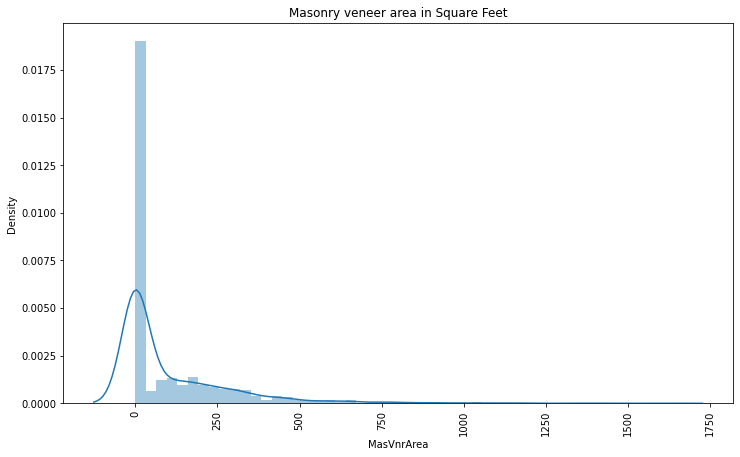

In [58]:
# Plotting a distplot for Veneer area

plt.figure(figsize = (12,7))
sns.distplot(house_data['MasVnrArea']).tick_params(axis='x', rotation = 90)
plt.title('Masonry veneer area in Square Feet')

Text(0.5, 1.0, 'Sales Price')

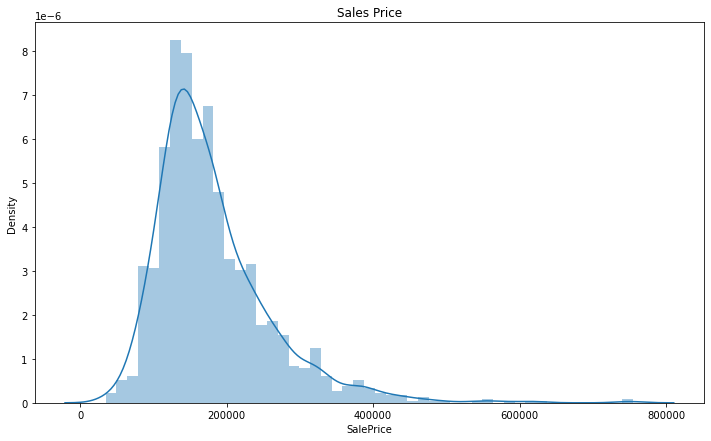

In [59]:
# Plotting a distplot for Sales price

plt.figure(figsize = (12,7))
sns.distplot(house_data['SalePrice'])
plt.title('Sales Price')

#### Checking the Skewness and Kurtosis for Sales Price (Skewness essentially measures the symmetry of the distribution, while kurtosis determines the heaviness of the distribution tails)

In [60]:
print("Skewness: %f" % house_data['SalePrice'].skew())
print("Kurtosis: %f" % house_data['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Text(0.5, 1.0, 'Basement Condition')

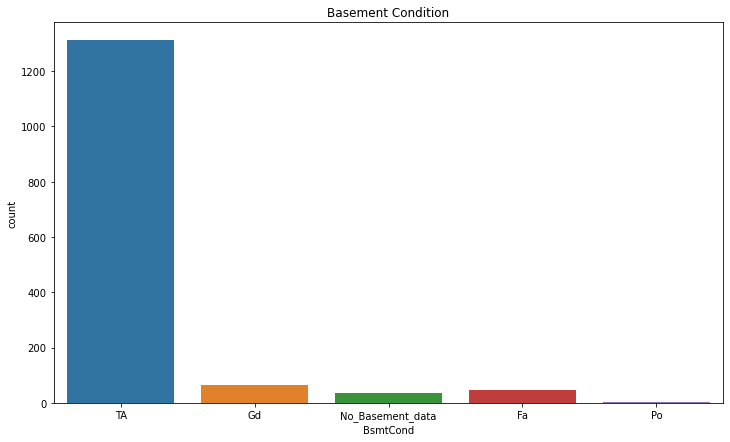

In [61]:
# Plotting for Basement counts

plt.figure(figsize = (12,7))
sns.countplot(x='BsmtCond', data= house_data)
plt.title('Basement Condition')

Ex - Excellent

Gd - Good

TA - Typical - slight dampness allowed

Fa - Fair - dampness or some cracking or settling

Po - Poor - Severe cracking, settling, or wetness

No_basement_data - No Basement

Text(0.5, 1.0, 'Overall Condition')

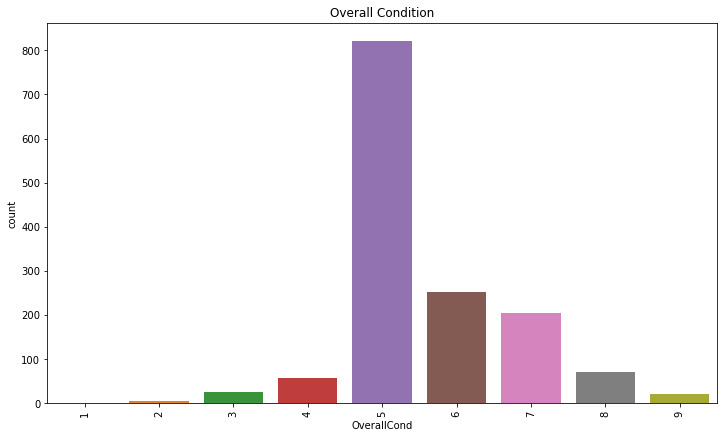

In [62]:
# Plotting for overall condition

plt.figure(figsize = (12,7))
sns.countplot(x='OverallCond', data= house_data).tick_params(axis='x', rotation = 90)
plt.title('Overall Condition')

#### 5 is most overall condition

Text(0.5, 1.0, 'Gr LivArea vs SalePrice')

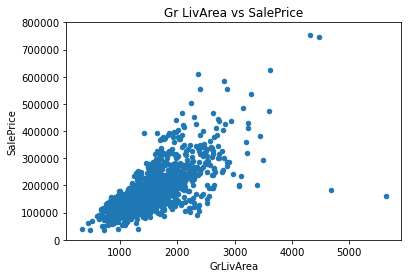

In [63]:
# Plotting Above grade (ground) living area (ft^2) vs Sale Price

data = pd.concat([house_data['SalePrice'], house_data['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));
plt.title('Gr LivArea vs SalePrice')

Text(0.5, 1.0, 'Overall Quality vs SalePrice')

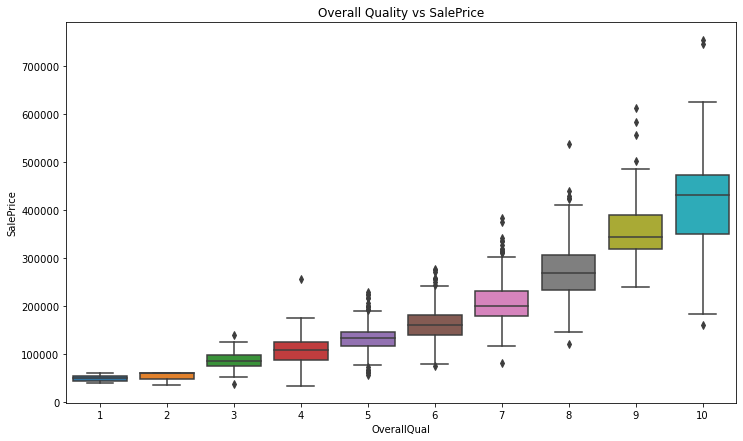

In [64]:
# Plotting Overall Quality vs Sale Price

plt.figure(figsize = (12,7))
sns.boxplot(x='OverallQual', y='SalePrice', data=house_data)
plt.title("Overall Quality vs SalePrice")

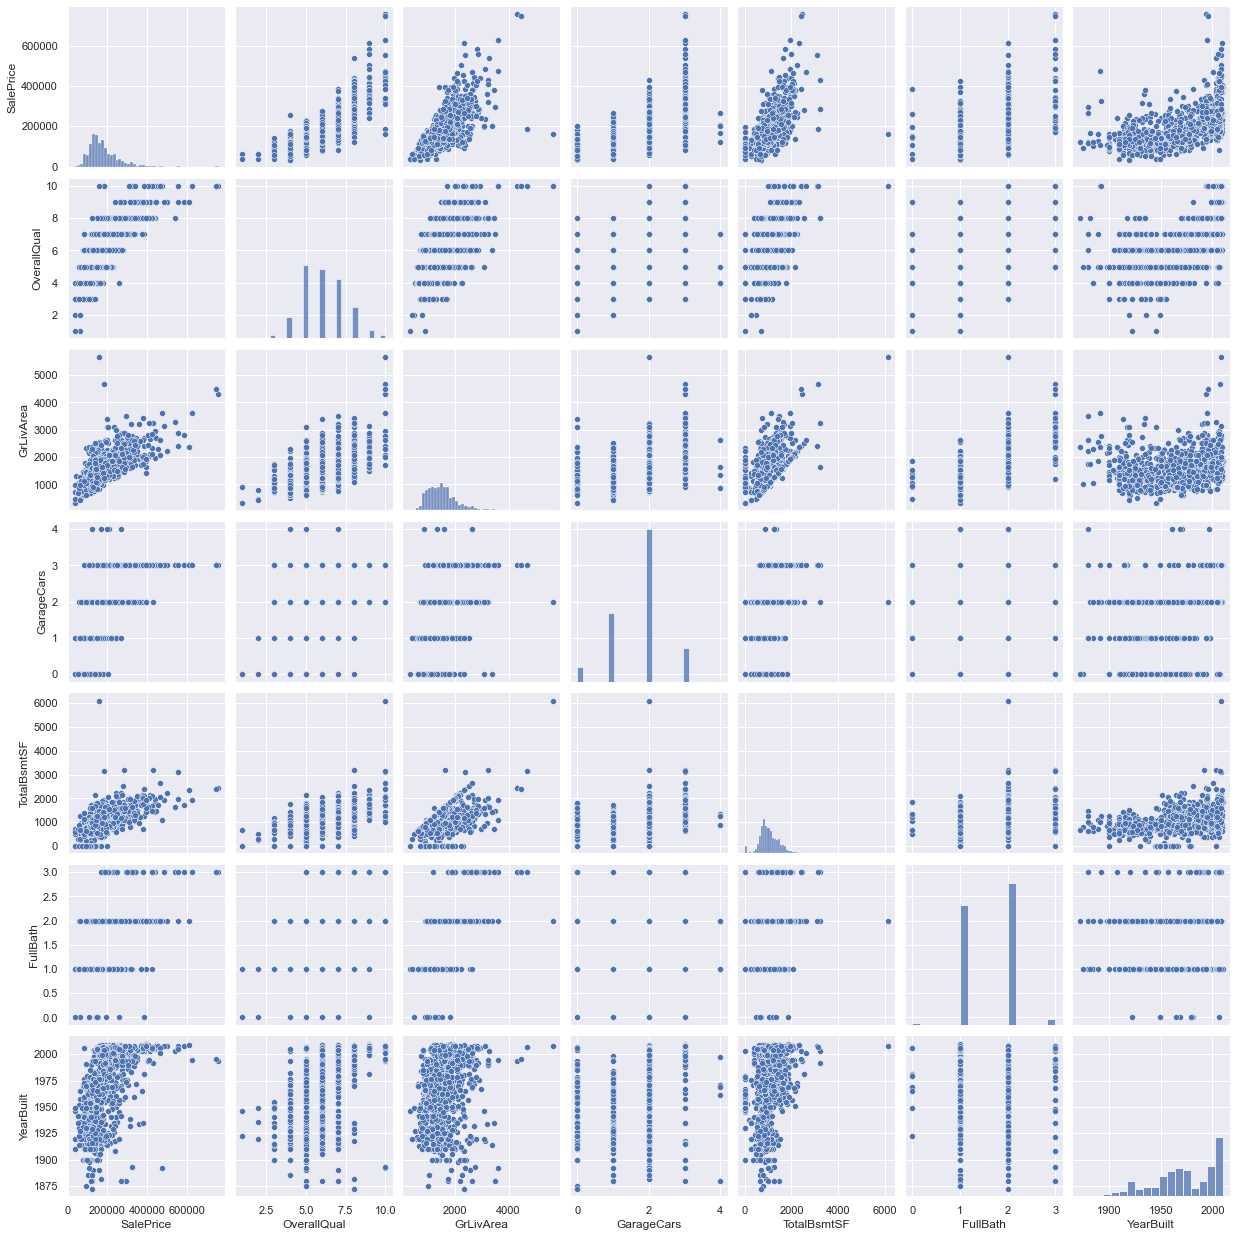

In [65]:
#Plotting scatterplot for the columns

sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house_data[cols], size = 2.5)
plt.show()

Text(0.5, 1.0, 'Checking Correlation matrix ')

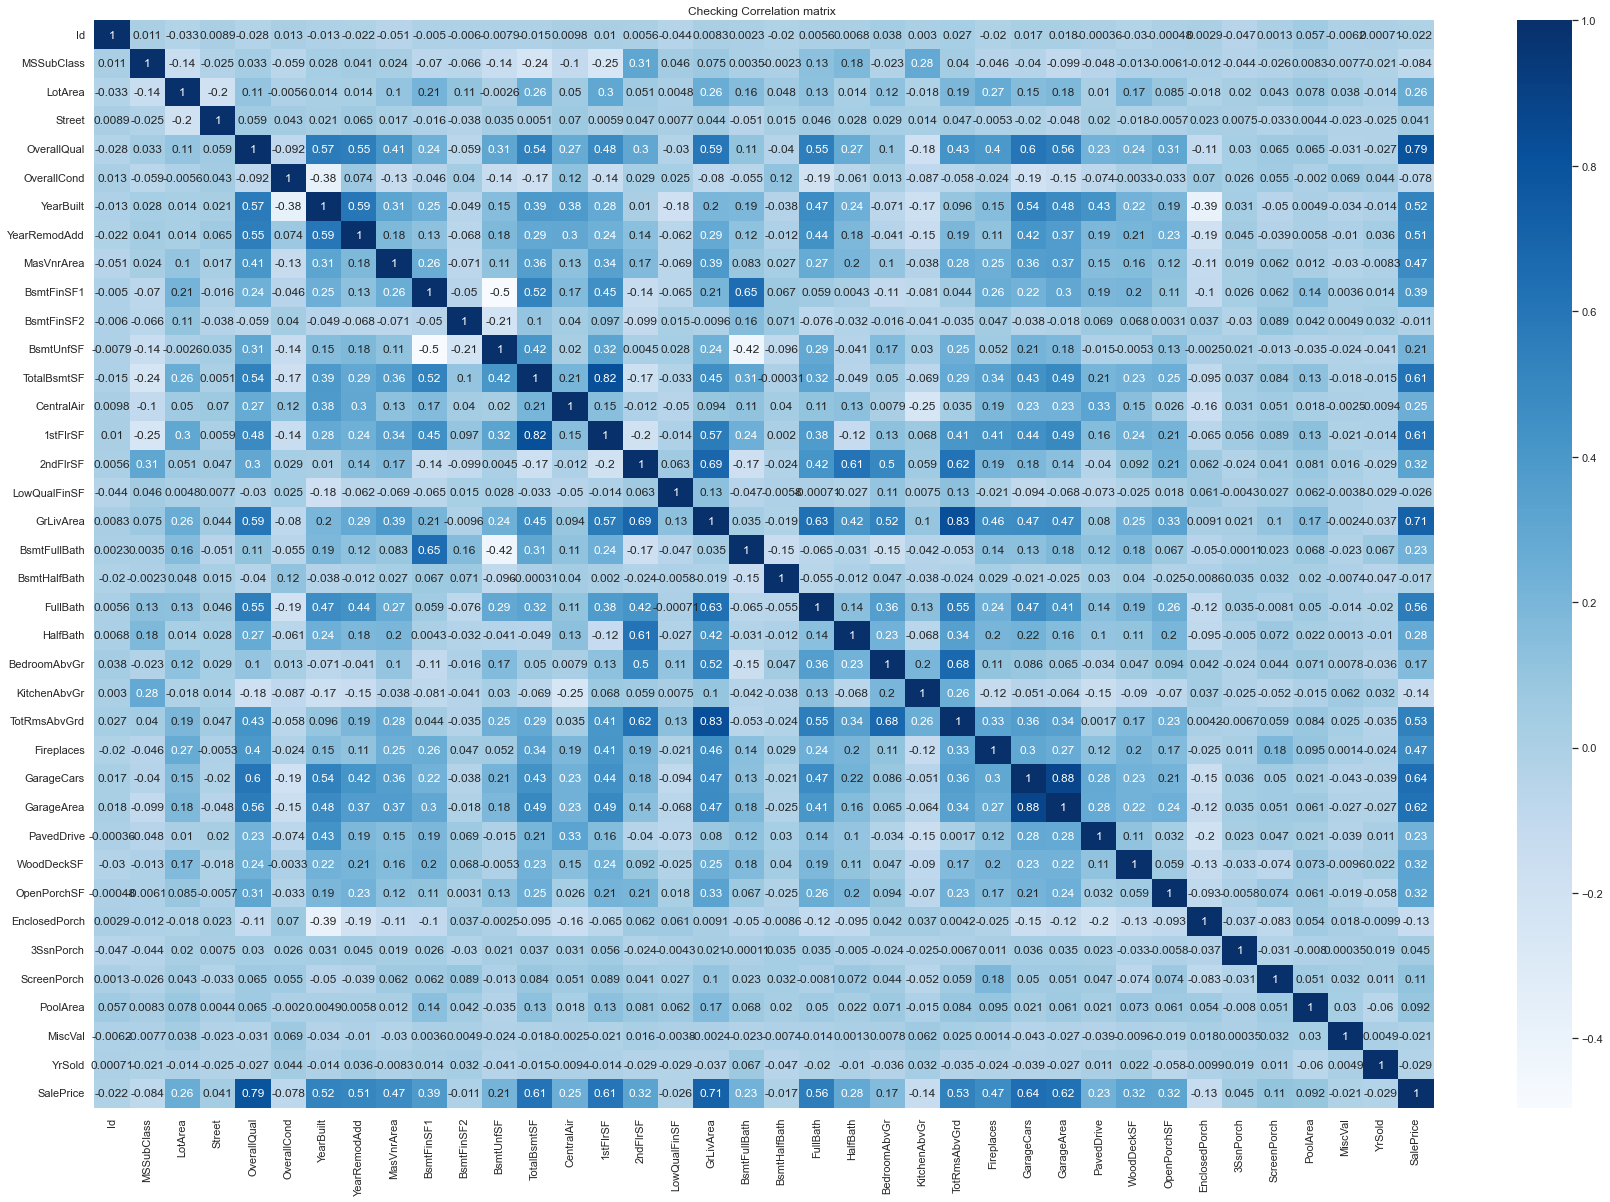

In [116]:
#checking correlation matrix

corrmat = house_data_numeric.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corrmat, annot=True, cmap="Blues", );
plt.title("Checking Correlation matrix ")

## Data Preparation

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

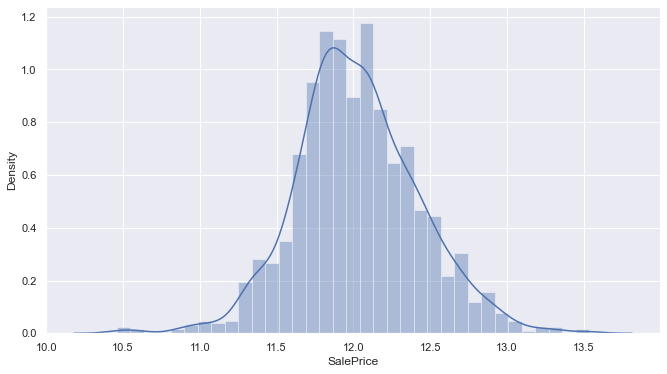

In [67]:
plt.figure(figsize=(11,6))
sns.distplot(np.log(house_data["SalePrice"]))

### Deriving Variables


In [68]:
numeric_data = house_data.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'YrSold', 'SalePrice'],
      dtype='object')

In [69]:
#Converting a Binary varible into numeric datatypes

house_data['Street'] = house_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )

house_data['CentralAir'] = house_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
                                                  
house_data['PavedDrive'] = house_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)                                                  

In [70]:
cat_values = house_data.select_dtypes(include=['object'])
cat_values.head()

,MSZoning,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
1,RL,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal
2,RL,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
3,RL,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,WD,Abnorml
4,RL,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal


In [71]:
# convert into dummies

dummy_data = pd.get_dummies(cat_values, drop_first=True)
dummy_data.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [72]:
# Dropping 'Id' column

df = house_data.drop(['Id'],axis=1)

In [73]:
# Droping the original categorical column

df = df.drop(list(cat_values.columns), axis=1)

In [74]:
# Adding the dummy categorical column to original dataset

df = pd.concat([df,dummy_data], axis=1)

In [75]:
df.shape

(1460, 240)

## Train Test Split

In [76]:
df_train,df_test = train_test_split(df, train_size=0.7,test_size = 0.3, random_state=100)

In [77]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [78]:
num_values=X_train.select_dtypes(include=['int64','float64']).columns
num_values

Index(['MSSubClass', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold'],
      dtype='object')

#### Scaling the data

In [79]:
scaler = StandardScaler()
X_train[num_values] = scaler.fit_transform(X_train[num_values])
X_test[num_values] = scaler.transform(X_test[num_values])

## Building the Model

In [80]:
## Building a Regression model

lr = LinearRegression()
lr.fit(X_train,y_train)
rfe = RFE(lr,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [81]:
col=X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Exterior1st_AsphShn',
       'Exterior1st_CBlock', 'Exterior2nd_AsphShn', 'Exterior2nd_CBlock',
       'BsmtQual_No_Basement_data', 'BsmtCond_No_Basement_data',
       'BsmtFinType1_No_Basement_data', 'GarageType_No_Garage_data',
       'GarageFinish_No_Garage_data', 'GarageCond_No_Garage_data',
       'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

In [82]:
import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

# Create first model
lr=sm.OLS(y_train,X_train_new)

# Fit the model
lr_model=lr.fit()

# Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     164.9
Date:                Wed, 07 Sep 2022   Prob (F-statistic):          1.61e-216
Time:                        22:05:11   Log-Likelihood:                 20.981
No. Observations:                1021   AIC:                            -17.96
Df Residuals:                    1009   BIC:                             41.18
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            12.0241      0.008   1471.848      0.000      12.008      12.040
BsmtFinSF1                        0.0527      0.007      7.394      0.000       0.039       0.067
BsmtFinSF2                        0.0063      0.008      0.838      0.402      -0.008       0.021
BsmtUnfSF                         0.0195      0.007      2.643      0.008       0.005       0.034
TotalBsmtSF                       0.0747      0.012      6.225      0.000       0.051       0.098
1stFlrSF                          0.0708      0.012      5.835      0.000       0.047       0.095
2ndFlrSF                          0.0751      0.007     10.998      0.000       0.062       0.089
LowQualFinSF                     -0.0225      0.008     -2.934      0.003      -0.037      -0.007
GrLivArea                         0.1124      0.006     18.279      0.000       0.100       0.124
Exterior1st_AsphShn               0.0300      0.123      0.244      0.807      -0.211       0.271
Exterior1st_CBlock               -0.1771      0.119     -1.483      0.138      -0.411       0.057
Exterior2nd_AsphShn               0.0300      0.123      0.244      0.807      -0.211       0.271
Exterior2nd_CBlock               -0.1771      0.119     -1.483      0.138      -0.411       0.057
BsmtQual_No_Basement_data        -0.0347      0.020     -1.709      0.088      -0.075       0.005
BsmtCond_No_Basement_data        -0.0347      0.020     -1.709      0.088      -0.075       0.005
BsmtFinType1_No_Basement_data    -0.0347      0.020     -1.709      0.088      -0.075       0.005
GarageType_No_Garage_data        -0.0933      0.011     -8.308      0.000      -0.115      -0.071
GarageFinish_No_Garage_data      -0.0933      0.011     -8.308      0.000      -0.115      -0.071
GarageCond_No_Garage_data        -0.0933      0.011     -8.308      0.000      -0.115      -0.071
SaleType_New                      0.1103      0.015      7.471      0.000       0.081       0.139
SaleCondition_Partial             0.1103      0.015      7.471      0.000       0.081       0.139
==============================================================================
Omnibus:                      896.837   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            68417.655
Skew:                          -3.599   Prob(JB):                         0.00
Kurtosis:                      42.452   Cond. No.                     3.70e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  2e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Ridge Regression

In [84]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation

folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [85]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.01}
-0.09115866166772155


In [86]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006406,1.493937e-03,0.002400,4.876115e-04,0.0001,{'alpha': 0.0001},-0.089606,-0.094264,-0.094173,-0.097412,...,-0.091660,0.005061,7,-0.055266,-0.056085,-0.056248,-0.057629,-0.056182,-0.056282,0.000761
1,0.005000,6.851538e-06,0.002002,2.514158e-06,0.001,{'alpha': 0.001},-0.089576,-0.094240,-0.094175,-0.096938,...,-0.091547,0.004971,4,-0.055320,-0.056091,-0.056310,-0.057672,-0.056235,-0.056326,0.000760
2,0.005001,2.898134e-06,0.002000,2.948689e-06,0.01,{'alpha': 0.01},-0.089940,-0.094017,-0.095295,-0.093604,...,-0.091159,0.004479,1,-0.056405,-0.056151,-0.057153,-0.058276,-0.057125,-0.057022,0.000740
3,0.004997,5.250841e-06,0.002003,3.200142e-06,0.05,{'alpha': 0.05},-0.094183,-0.093315,-0.099104,-0.087705,...,-0.092311,0.004416,13,-0.060478,-0.056477,-0.060357,-0.061803,-0.061000,-0.060023,0.001845
4,0.005400,4.886800e-04,0.002001,2.611745e-06,0.1,{'alpha': 0.1},-0.096487,-0.092944,-0.101069,-0.086154,...,-0.093387,0.005114,17,-0.063073,-0.056884,-0.062585,-0.064603,-0.063914,-0.062212,0.002753
5,0.005002,4.768372e-07,0.001999,4.623108e-07,0.2,{'alpha': 0.2},-0.098534,-0.092844,-0.102321,-0.085103,...,-0.094274,0.005865,23,-0.065511,-0.057531,-0.064540,-0.067589,-0.066655,-0.064365,0.003569
6,0.005002,2.611745e-07,0.001999,5.519789e-07,0.3,{'alpha': 0.3},-0.099229,-0.092997,-0.102827,-0.084073,...,-0.094471,0.006392,26,-0.066793,-0.058057,-0.065515,-0.069173,-0.068111,-0.065530,0.003934
7,0.005001,3.371748e-07,0.002000,2.861023e-07,0.4,{'alpha': 0.4},-0.099485,-0.093129,-0.103077,-0.083091,...,-0.094423,0.006809,25,-0.067664,-0.058548,-0.066170,-0.070198,-0.069068,-0.066330,0.004119
8,0.005602,4.905246e-04,0.002000,7.688768e-07,0.5,{'alpha': 0.5},-0.099488,-0.093224,-0.103197,-0.082417,...,-0.094311,0.007065,24,-0.068353,-0.059003,-0.066638,-0.070919,-0.069803,-0.066943,0.004222
9,0.005604,4.914035e-04,0.002397,4.875412e-04,0.6,{'alpha': 0.6},-0.099375,-0.093293,-0.103271,-0.082113,...,-0.094230,0.007172,22,-0.068928,-0.059399,-0.067020,-0.071486,-0.070387,-0.067444,0.004292


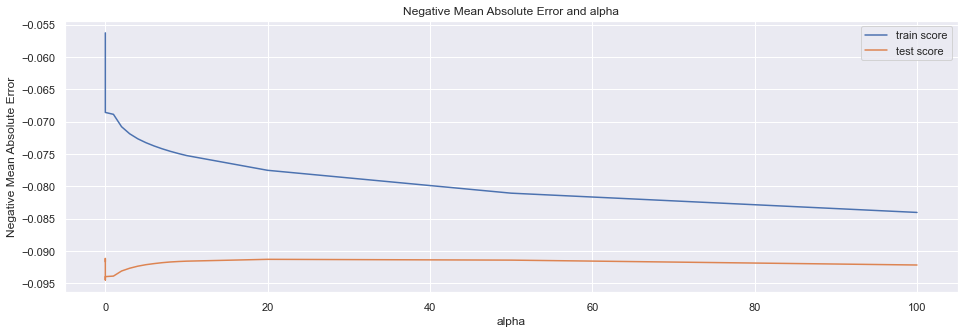

In [87]:
# plotting mean test and train scoes with alpha

cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting

plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [88]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.05544563e-02,  1.73548773e-02,  7.32114591e-03,  8.14604341e-02,
        3.96179185e-02,  3.49654818e-02,  2.14949713e-02, -1.96440718e-03,
       -3.83302707e-03,  7.25457403e-03,  5.32232154e-03,  4.01898100e-03,
        1.57407302e-02,  3.71374539e-02,  4.23336857e-02,  1.44973041e-03,
        6.25520350e-02,  3.09462332e-02,  3.94724845e-03,  1.92187593e-02,
        1.15118378e-02,  1.18418887e-02, -1.40546215e-02,  1.59208225e-02,
        1.92342742e-02, -3.73544287e-07,  4.16300846e-02,  3.27445260e-03,
        1.88370160e-03,  1.34554175e-02, -2.49737269e-03,  8.87574513e-03,
        7.48675956e-03,  1.11573152e-02, -1.68629871e-02, -1.31926895e-03,
       -7.23578020e-03,  4.97663023e-02,  4.01011784e-02,  6.28985604e-02,
        1.57220448e-02,  2.46065338e-02, -5.19746806e-02,  4.19107946e-03,
        3.65834490e-02,  3.83104239e-02,  4.37431819e-02, -1.21724027e-02,
        3.92414953e-02, -3.36468307e-02, -9.31118452e-03, -5.96993204e-03,
        2.73752741e-02, -

In [89]:
#Predicting the R-squared value

y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9189643169489214


In [90]:
# Prediction on test set

y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8892919773155674


In [91]:
# RMSE value

mean_squared_error(y_test, y_test_pred)

0.01821591095308213

In [110]:
ridge = Ridge(alpha = 0.1)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9487966179270387
0.8794576422706879


In [111]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feature','Coef']

In [112]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSSubClass,10.655113
116,RoofMatl_WdShngl,1.103909
110,RoofMatl_CompShg,1.050724
113,RoofMatl_Roll,1.029703
111,RoofMatl_Membran,0.959408
114,RoofMatl_Tar&Grv,0.920720
115,RoofMatl_WdShake,0.911401
112,RoofMatl_Metal,0.877652
39,MSZoning_RH,0.408200
40,MSZoning_RL,0.407829


## Lasso Regression

In [92]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [93]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [94]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.0001}
-0.08764744082067194


In [95]:
# Final lasso model

alpha = 0.001
lasso = Lasso(alpha=alpha)   
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [96]:
#Predicting R-squared value for Train data

y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9057162529919951


In [97]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8838939040896828


In [98]:
# RMSE value

mean_squared_error(y_test, y_test_pred)

0.019104110550695903

In [99]:
lasso.coef_

array([-1.74822972e-02,  1.68437642e-02,  7.11210580e-03,  9.21715894e-02,
        4.30403651e-02,  4.88551243e-02,  2.19045188e-02, -0.00000000e+00,
       -0.00000000e+00,  2.58966683e-03,  5.99238611e-03,  1.17727420e-02,
        1.38878321e-02,  1.09215080e-03,  0.00000000e+00, -1.32343662e-03,
        1.11768018e-01,  3.42278814e-02,  3.90419449e-03,  1.70710128e-02,
        1.01458645e-02,  7.44800310e-03, -1.12018692e-02,  1.39568381e-02,
        1.88336037e-02, -1.91605259e-06,  4.73611807e-02,  0.00000000e+00,
        1.91418242e-03,  1.39657574e-02, -3.05896502e-04,  7.28040283e-03,
        5.89118906e-03,  1.15241142e-02, -1.98549586e-02, -9.24782153e-04,
       -7.19954604e-03,  0.00000000e+00,  0.00000000e+00,  5.18559438e-02,
       -2.16380032e-03,  0.00000000e+00, -1.51339202e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  5.50056552e-03, -0.00000000e+00,
        3.26751317e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        3.19077698e-03,  

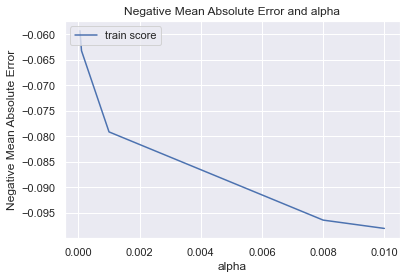

In [100]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [101]:
model_cv.best_params_

{'alpha': 0.01}

In [106]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9057162529919951
0.8838939040896828


In [108]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Feature','Coef']

In [109]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feature,Coef
0,MSSubClass,11.846506
17,BsmtFullBath,0.111768
60,Neighborhood_Crawfor,0.108683
75,Neighborhood_Somerst,0.103722
70,Neighborhood_NridgHt,0.092385
4,OverallCond,0.092172
80,Condition1_Norm,0.057529
119,Exterior1st_BrkFace,0.054527
40,MSZoning_RL,0.051856
169,BsmtExposure_Gd,0.050618


Best alpha value for Lasso : {'alpha': 0.001}

Best alpha value for Ridge : {'alpha': 0.1}

#### After compairing both the model, the below mentioned Features are best explaining the DataSet

- MSSubClass
- RoofMatl_Membran - Roof material made of Membran
- MSZoning_RL - Residential Low Density
- MSZoning_RH - Residential High Density
- BsmtFullBath - Basement full bathrooms
- RoofMatl_WdShngl - Roof material made of Wood Shingles
- Neighborhood - Crawford